In [8]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def ncc(patch, tgt):
    p_avg = np.mean(patch)
    t_avg = np.mean(tgt)
    p_std = np.std(patch)
    t_std = np.std(tgt)
    norm_p = (patch-p_avg)/(p_std)
    norm_t = (tgt-t_avg)/(t_std)
    return (1.0/(patch.size-1)) * np.sum(norm_p*norm_t)

In [10]:
right = plt.imread('right.png')
left = plt.imread('left.png')

disparity = np.zeros(right.shape)
start = timer()
for r in range(5, right.shape[0] - 5):
    for c in range(right.shape[1] -6, 5, -1):
        left_patch = left[r-5:r+6, c-5:c+6]
        ncc_vals = []
        max_c = -1
        max_ncc = -1
        for offset in range(50):
            offset_c = c - offset
            if offset_c >= 5:
                right_patch = right[r-5:r+6, offset_c-5:offset_c+6]
                ncc_vals.append(ncc(left_patch, right_patch))
        max_c = np.argmax(ncc_vals)
        disparity[r, c] = max_c

end = timer()
print(end - start)



320.38123846199994


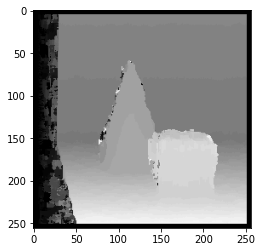

In [11]:
filter = np.copy(disparity)
filter[filter >= 50] = 50
filter[filter <= 0] = 0
plt.figure()
plt.imshow(filter, cmap='gray')
plt.show()

From matlab API for the clims imagesc option that's used: 
"imagesc(img, [cmin, cmax]) : values <= cmin map to the first color in the cmap, values >= cmax map to the last color in the cmap, values between linearly map to the cmap"
So to emulate this in python we can replace all values >=50 with 50 and all values <=0 with 0.
The images given were fairly difficult for me (a human) to make out the depth, because of all the patterns. However, it seems like these weird patterns make it easier for a computer to detect depth, because there is a concrete uniform pattern to match in each image. 
